In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [120]:
df = pd.read_csv('/Users/kothasravani/Desktop/to_clean.csv')

/var/folders/_p/sktqnyb16qlfj7xjl0gfncgh0000gn/T/ipykernel_31247/2240761354.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/kothasravani/Desktop/to_clean.csv')


#### Step 1: Clean and prepare data

In [3]:
df.shape

(400000, 32)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      338990 non-null  object 
 1   X2      399999 non-null  float64
 2   X3      399999 non-null  float64
 3   X4      399999 non-null  object 
 4   X5      399999 non-null  object 
 5   X6      399999 non-null  object 
 6   X7      399999 non-null  object 
 7   X8      338730 non-null  object 
 8   X9      338730 non-null  object 
 9   X10     376014 non-null  object 
 10  X11     382462 non-null  object 
 11  X12     338639 non-null  object 
 12  X13     338972 non-null  float64
 13  X14     399999 non-null  object 
 14  X15     399999 non-null  object 
 15  X16     123560 non-null  object 
 16  X17     399999 non-null  object 
 17  X18     399981 non-null  object 
 18  X19     399999 non-null  object 
 19  X20     399999 non-null  object 
 20  X21     399999 non-null  float64
 21  X22     39

In [5]:
#There is one row that is causing one missing value in all columns. 
missing_rows = df[df['X2'].isna()]

print('Rows with missing values:')
print(missing_rows)

Rows with missing values:
           X1  X2  X3   X4   X5   X6   X7   X8   X9  X10  ...  X23 X24  X25  \
364111  7.69% NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN NaN  NaN   

       X26 X27 X28 X29  X30 X31  X32  
364111 NaN NaN NaN NaN  NaN NaN  NaN  

[1 rows x 32 columns]


In [6]:
#Dropping one row that is causing missing values in all columns and dropping the rows with null values in 
#interest rate column as it is the target variable
df = df.dropna(subset=['X1'])
df = df.dropna(subset=['X2'])

In [7]:
df[['X4','X5','X6']].head(10)

,X4,X5,X6
0,"$25,000","$25,000","$19,080"
1,"$7,000","$7,000",$673
2,"$25,000","$25,000","$24,725"
3,"$1,200","$1,200","$1,200"
4,"$10,800","$10,800","$10,692"
5,"$7,200","$7,200","$7,200"
6,"$7,500","$5,025",$557
7,"$3,000","$3,000","$2,988"
8,"$4,000","$4,000","$3,900"
9,"$5,600","$5,600","$5,525"


In [8]:
#Removing special characters from loan amount requested, funded and investor funded portion of loan columns
df[['X4', 'X5','X6']] = df[['X4', 'X5','X6']].replace({'\$':'', ',':''}, regex=True).astype(float)
df[['X4', 'X5','X6']].head(20)

,X4,X5,X6
0,25000.0,25000.0,19080.0
1,7000.0,7000.0,673.0
2,25000.0,25000.0,24725.0
3,1200.0,1200.0,1200.0
4,10800.0,10800.0,10692.0
5,7200.0,7200.0,7200.0
6,7500.0,5025.0,557.0
7,3000.0,3000.0,2988.0
8,4000.0,4000.0,3900.0
9,5600.0,5600.0,5525.0


In [ ]:
# count the number of values that are not the same X4 and X5
count_not_same = df['X4'].ne(df['X5']).sum()

print("Number of values that are not the same in the two columns:", count_not_same)

dropping loan_id and borrower_id as they might not contribute anything significant to the model because they 
are all unique. Amount requested and amount funded columns have almost same values and I am therefore 
dropping X4. I am dropping loan subgrade as it would take too many variables to use it for any explanation and there is a loan grade variable anyway. Dropping loan reason as it has too many missing values and loan title because it has alot of meaning less text and also there is a loan category column that can explain some of what title can. And X26 has more than 50% missing values. 


In [9]:
df = df.drop(['X2','X3','X4','X9','X16','X18','X26'],axis=1)

/var/folders/_p/sktqnyb16qlfj7xjl0gfncgh0000gn/T/ipykernel_31247/1926396633.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['X1'])


<AxesSubplot: xlabel='X1', ylabel='Density'>

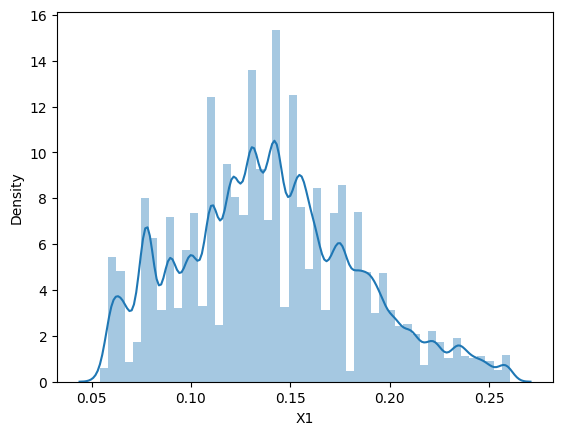

In [10]:
#removing special characters in target varaible, converting it to float and dividing it by 100
df['X1']=df['X1'].replace({'%':''}, regex=True).astype(float)
df['X1'] = df['X1']/100
sns.distplot(df['X1'])

In [11]:
df['X7'].value_counts()

 36 months    247791
 60 months     91198
Name: X7, dtype: int64

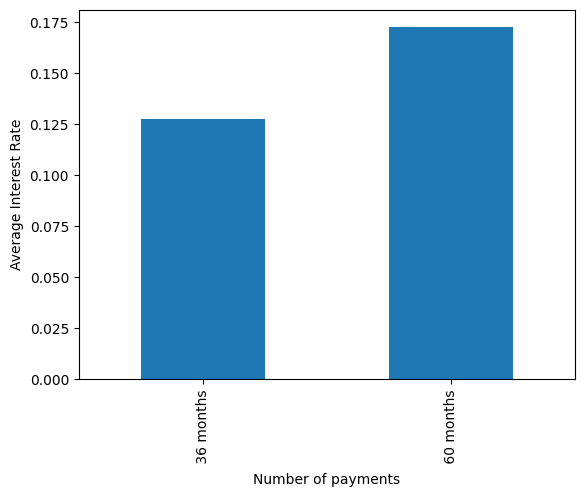

In [12]:
#plotting relationship between number of payments and average interest rate
grouped = df.groupby('X7')['X1'].mean()
grouped.plot(kind='bar')
plt.xlabel('Number of payments')
plt.ylabel('Average Interest Rate')
plt.show()

In [13]:
#creating a new feature for 60 months using dummy variable from the number of payments column
df['X7_60months'] = df['X7'].apply(lambda x: 1 if x == '60 months' else 0)
df = df.drop('X7',axis=1)

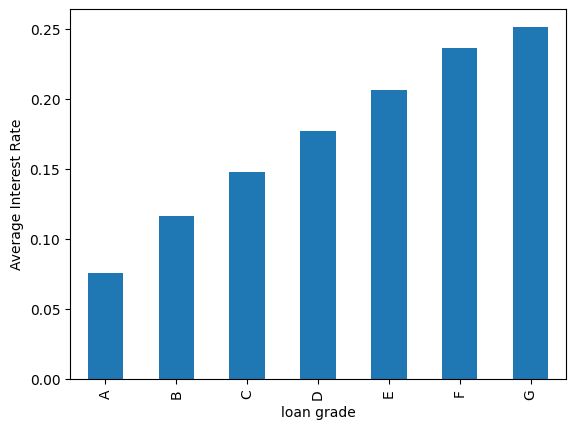

In [14]:
#plotting relationship between loangrade and average interest rate
grouped = df.groupby('X8')['X1'].mean()
grouped.plot(kind='bar')
plt.xlabel('loan grade')
plt.ylabel('Average Interest Rate')
plt.show()

In [15]:
#Creating a separate column with null values as I dont want to lose any rows in the data and also 
#I want loan grade in my variables
df['X8'].fillna('Unknown', inplace=True)
X8_dummies = pd.get_dummies(df['X8'], prefix='X8')
df = pd.concat([df, X8_dummies], axis=1)
df = df.drop('X8',axis=1)

In [16]:
#Being unemployed might significantly affect the interest rate but job title is not capturing 
#employment/unemployment well
df = df.drop('X10',axis=1)

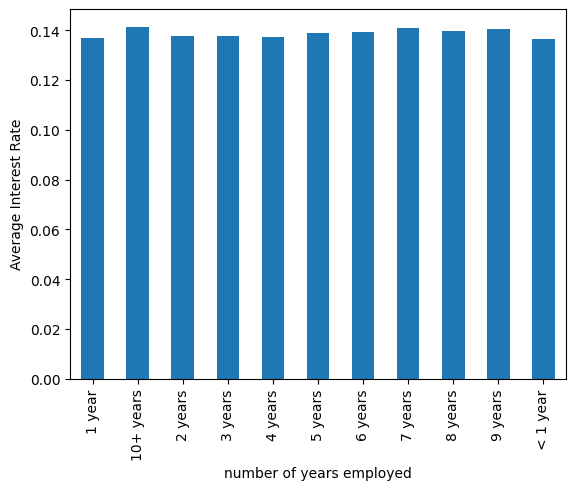

In [17]:
# Plotting relationship between average interest rate and number of years employed
grouped = df.groupby('X11')['X1'].mean()
grouped.plot(kind='bar')
plt.xlabel('number of years employed')
plt.ylabel('Average Interest Rate')
plt.show()

In [18]:
#chceking for correlation to decide whether to keep the column or drop it
import scipy.stats
# Group the data by the categorical column
grouped = df.groupby('X11')['X1'].mean()

# Calculate the correlation using the spearman method
correlation, p_value = scipy.stats.spearmanr(grouped.index, grouped.values)
print("The spearman correlation between number of years employed and the target variable is:", correlation)

The spearman correlation between number of years employed and the target variable is: 0.10909090909090911


In [19]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
df['X11'] = df['X11'].astype('category')
df_model = df[['X11', 'X1']]
zip_dummies = pd.get_dummies(df_model['X11'], prefix='zip')
df_model = pd.concat([zip_dummies, df_model['X1']], axis=1)
X = df_model.iloc[:, :-1]
y = df_model.iloc[:, -1]
reg = LinearRegression().fit(X, y)
r_squared = reg.score(X, y)
print("R-squared:", r_squared)

R-squared: 0.0016400338555224714


In [20]:
#dropping the column as both corrleation and R-squared do not imply significance
df = df.drop('X11',axis=1)

In [21]:
df['X12'].value_counts()

MORTGAGE    145958
RENT        115958
OWN          24976
OTHER          107
NONE            30
ANY              1
Name: X12, dtype: int64

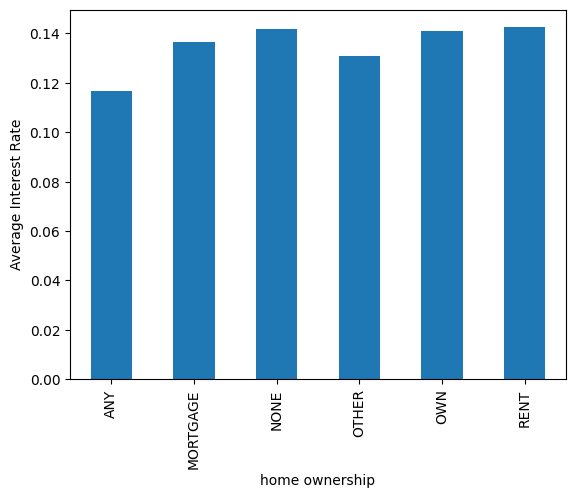

In [23]:
# Plotting relationship between average interest rate and home ownership
grouped = df.groupby('X12')['X1'].mean()
grouped.plot(kind='bar')
plt.xlabel('home ownership')
plt.ylabel('Average Interest Rate')
plt.show()

In [24]:
import scipy.stats
# Group the data by the categorical column
grouped = df.groupby('X12')['X1'].mean()

# Calculate the correlation using the spearman method
correlation, p_value = scipy.stats.spearmanr(grouped.index, grouped.values)
print("The spearman correlation between number of years employed and the target variable is:", correlation)

The spearman correlation between number of years employed and the target variable is: 0.7142857142857143


In [25]:
#df['X12'].replace('ANY','MORTGAGE',inplace=True)
#df['X12'].fillna('NaN', inplace=True)
#X12_dummies = pd.get_dummies(df['X12'], prefix='X12')
#df = pd.concat([df, X12_dummies], axis=1)
df = df.drop('X12',axis=1)
#Though the variable as a whole seems to have a good correlation, mortgage, rent and own categories which
#constitute majority of the values donot seem to be varying much with average interest rate

/var/folders/_p/sktqnyb16qlfj7xjl0gfncgh0000gn/T/ipykernel_31247/3467714507.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['X13'].notnull()]['X13'])


<AxesSubplot: xlabel='X13', ylabel='Density'>

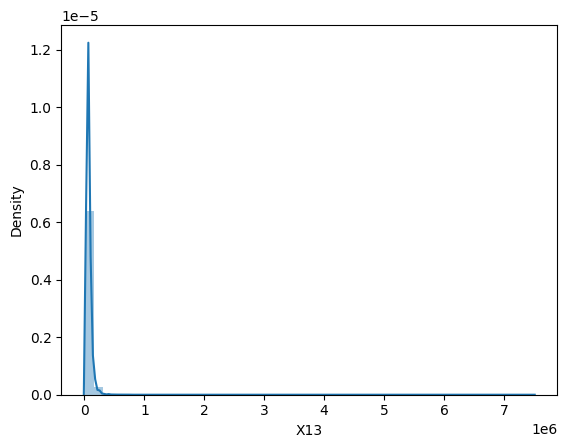

In [26]:
sns.distplot(df[df['X13'].notnull()]['X13'])

In [27]:
df['X13'].head()

0    85000.0
1    65000.0
2    70000.0
3    54000.0
4    32000.0
Name: X13, dtype: float64

In [28]:
# Fill missing values in the column with the median as income usually has outliers
df['X13'].fillna(df['X13'].median(), inplace=True)

In [29]:
#Believing verification of income/income source will have the same impact on target variable:
df['X14'] = df['X14'].replace(['VERIFIED - income source'], 'VERIFIED - income')

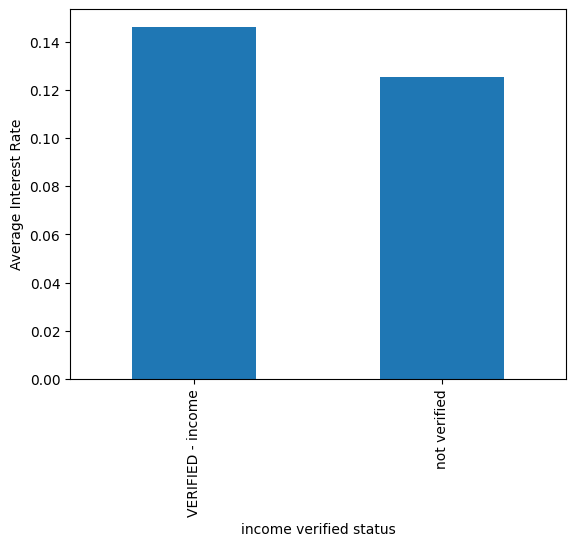

In [30]:
# plotting relationship between income verified ststus and average interest rate
grouped = df.groupby('X14')['X1'].mean()
grouped.plot(kind='bar')
plt.xlabel('income verified status')
plt.ylabel('Average Interest Rate')
plt.show()

In [31]:
#Creating a separate column to capture significance of income-verified
df['X14_verified'] = df['X14'].apply(lambda x: 1 if x == 'VERIFIED - income' else 0)
df = df.drop('X14', axis=1)

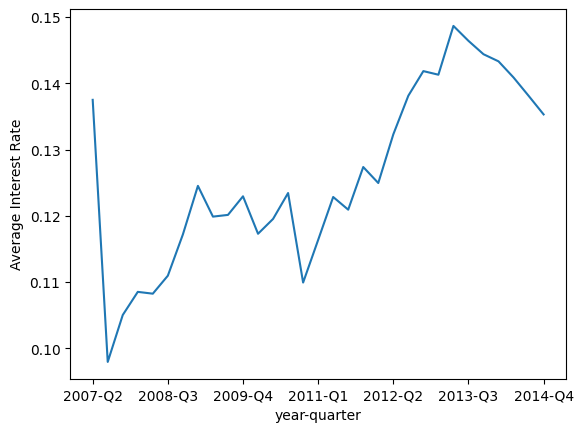

In [32]:
#plotting relation between year-quarter and average interest rate
df['X15'] = pd.to_datetime(df['X15'], format='%b-%y')
df['X15_year_quarter'] = df['X15'].dt.to_period('Q').apply(lambda x: str(x.year) + '-Q' + str(x.quarter))
grouped = df.groupby('X15_year_quarter')['X1'].mean()
grouped.plot(kind='line')
plt.xlabel('year-quarter')
plt.ylabel('Average Interest Rate')
plt.show()

In [33]:
import scipy.stats
# Group the data by the categorical column
grouped = df.groupby('X15_year_quarter')['X1'].mean()

# Calculate the correlation using the spearman method
correlation, p_value = scipy.stats.spearmanr(grouped.index, grouped.values)
print("The spearman correlation between year-quarter and the target variable is:", correlation)

The spearman correlation between year-quarter and the target variable is: 0.7903225806451613


In [34]:
#X15_dummies = pd.get_dummies(df['X15_year_quarter'], prefix='X15')
#df = pd.concat([df, X15_dummies], axis=1)
df = df.drop(['X15','X15_year_quarter'],axis=1)
#though this variable is reducing RMSE a little bit, it is taking too many features and also holdout set 
#does not have these year-quarters

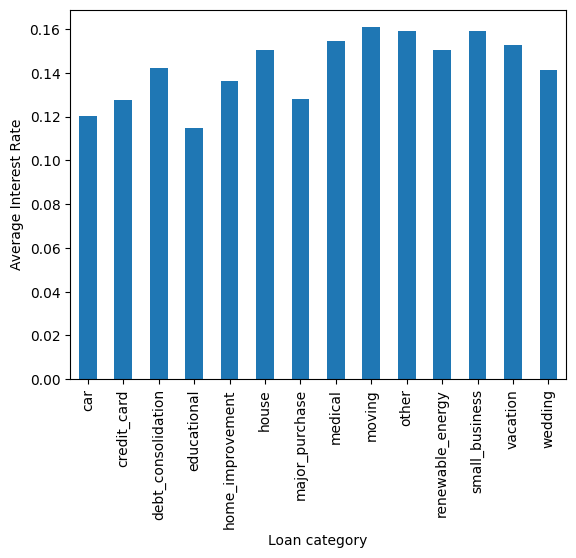

In [35]:
# plotting relation between loan category and average interest rate
grouped = df.groupby('X17')['X1'].mean()
grouped.plot(kind='bar')
plt.xlabel('Loan category')
plt.ylabel('Average Interest Rate')
plt.show()

In [36]:
import scipy.stats
# Group the data by the categorical column
grouped = df.groupby('X17')['X1'].mean()

# Calculate the correlation using the spearman method
correlation, p_value = scipy.stats.spearmanr(grouped.index, grouped.values)
print("The spearman correlation between loan category and the target variable is:", correlation)

The spearman correlation between loan category and the target variable is: 0.6351648351648352


In [37]:
#keeping the variable. correlation implies significance 
X17_dummies = pd.get_dummies(df['X17'], prefix='X17')
df = pd.concat([df, X17_dummies], axis=1)
df = df.drop('X17',axis=1)

In [38]:
import scipy.stats
# Group the data by the categorical column
grouped = df.groupby('X19')['X1'].mean()

# Calculate the correlation using the spearman method
correlation, p_value = scipy.stats.spearmanr(grouped.index, grouped.values)
print("The spearman correlation between zip code and the target variable is:", correlation)


The spearman correlation between zip code and the target variable is: -0.00831333387228718


In [39]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
df['X19'] = df['X19'].astype('category')
df_model = df[['X19', 'X1']]
zip_dummies = pd.get_dummies(df_model['X19'], prefix='zip')
df_model = pd.concat([zip_dummies, df_model['X1']], axis=1)
X = df_model.iloc[:, :-1]
y = df_model.iloc[:, -1]
reg = LinearRegression().fit(X, y)
r_squared = reg.score(X, y)
print("R-squared:", r_squared)


R-squared: 0.007057344951110545


In [40]:
#dropping zip as it would take too many features for little explanation
df = df.drop('X19',axis=1)

In [41]:
import scipy.stats
# Group the data by the categorical column
grouped = df.groupby('X20')['X1'].mean()

# Calculate the correlation using the spearman method
correlation, p_value = scipy.stats.spearmanr(grouped.index, grouped.values)
print("The spearman correlation between state and the target variable is:", correlation)

The spearman correlation between state and the target variable is: 0.003889555822328931


In [42]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
df['X20'] = df['X20'].astype('category')
df_model = df[['X20', 'X1']]
zip_dummies = pd.get_dummies(df_model['X20'], prefix='zip')
df_model = pd.concat([zip_dummies, df_model['X1']], axis=1)
X = df_model.iloc[:, :-1]
y = df_model.iloc[:, -1]
reg = LinearRegression().fit(X, y)
r_squared = reg.score(X, y)
print("R-squared:", r_squared)

R-squared: 0.0015995403118501672


In [43]:
#dropping borrower state as it would take too many features for little explanation
df = df.drop('X20',axis=1)

In [46]:
#fixing year in credit line opened date column
def fix_year(date):
    parts = date.split("-")
    month = parts[0]
    year = int(parts[1].zfill(2))
    if year >= 50:
        year += 1900
    else:
        year += 2000
    return month + "-" + str(year)


df['X23'] = [fix_year(date) for date in df['X23']]

In [47]:
df['X23'].value_counts()

Oct-2000    2725
Aug-2000    2610
Oct-1999    2516
Nov-1999    2483
Oct-2001    2460
            ... 
May-1958       1
Jan-1953       1
Nov-1958       1
Apr-1955       1
Dec-1958       1
Name: X23, Length: 653, dtype: int64

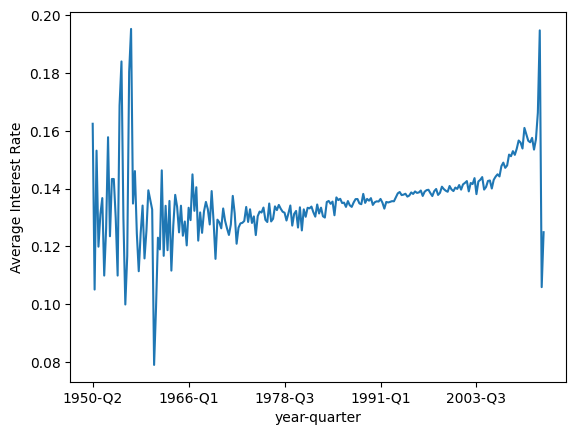

In [48]:
# convert the values to datetime objects
df['X23'] = pd.to_datetime(df['X23'], format='%b-%Y')

# create a new column with year and quarter
df['X23_year_quarter'] = df['X23'].dt.to_period('Q').apply(lambda x: str(x.year) + '-Q' + str(x.quarter))

# Group the data by the values in the x column and compute the mean of the y values in each group
grouped = df.groupby('X23_year_quarter')['X1'].mean()

# Plot a graph of the x column versus the average y values
grouped.plot(kind='line')

# Add labels to the x and y axes
plt.xlabel('year-quarter')
plt.ylabel('Average Interest Rate')

# Show the plot
plt.show()

In [49]:
import scipy.stats
# Group the data by the categorical column
grouped = df.groupby('X23_year_quarter')['X1'].mean()

# Calculate the correlation using the spearman method
correlation, p_value = scipy.stats.spearmanr(grouped.index, grouped.values)
print("The spearman correlation between year-quarter and the target variable is:", correlation)

The spearman correlation between year-quarter and the target variable is: 0.6071086047230952


In [50]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
df['X23'] = df['X23'].astype('category')
df_model = df[['X23', 'X1']]
zip_dummies = pd.get_dummies(df_model['X23'], prefix='X23')
df_model = pd.concat([zip_dummies, df_model['X1']], axis=1)
X = df_model.iloc[:, :-1]
y = df_model.iloc[:, -1]
reg = LinearRegression().fit(X, y)
r_squared = reg.score(X, y)
print("R-squared:", r_squared)

R-squared: 0.011288910350829351


In [51]:
#column would take too many features for little explanation
df = df.drop(['X23'],axis=1)

/var/folders/_p/sktqnyb16qlfj7xjl0gfncgh0000gn/T/ipykernel_31247/2977508683.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['X30'].notnull()]['X30'])


<AxesSubplot: xlabel='X30', ylabel='Density'>

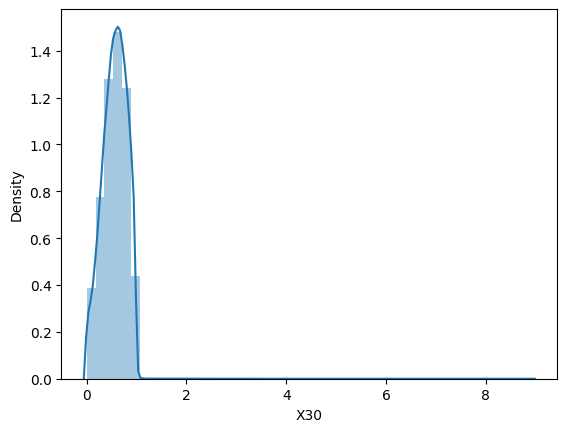

In [53]:
#removing special features in revolving line utilisation rate column, converting it to float and dividing by 100
df['X30']=df['X30'].replace({'%':''}, regex=True).astype(float)
df['X30']=df['X30']/100
sns.distplot(df[df['X30'].notnull()]['X30'])

/var/folders/_p/sktqnyb16qlfj7xjl0gfncgh0000gn/T/ipykernel_31247/875135253.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['X30'])


<AxesSubplot: xlabel='X30', ylabel='Density'>

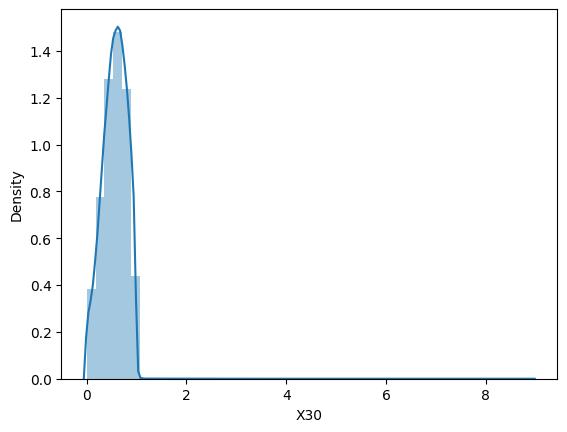

In [54]:
#interpolating missing values
df['X30']=df['X30'].interpolate()
sns.distplot(df['X30'])

In [55]:
#creating a column for closed credit line
df['closed_creditline'] = df['X31'] - df['X27']
df['unclosed_creditline'] = df['closed_creditline'].apply(lambda x: 1 if x == 0 else 0)
df = df.drop(['X31', 'closed_creditline'], axis=1)

In [122]:
df['X32'].value_counts()

f    274313
w    125686
Name: X32, dtype: int64

In [56]:
X32_dummies = pd.get_dummies(df['X32'], prefix='X32')
df = pd.concat([df, X32_dummies], axis=1)
df = df.drop(['X32'],axis=1)

In [57]:
duplicate_df=df.copy()

In [58]:
df['X25'].head()

0     NaN
1     NaN
2    41.0
3    64.0
4    58.0
Name: X25, dtype: float64

/var/folders/_p/sktqnyb16qlfj7xjl0gfncgh0000gn/T/ipykernel_31247/432376727.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['X25'].notnull()]['X25'])


<AxesSubplot: xlabel='X25', ylabel='Density'>

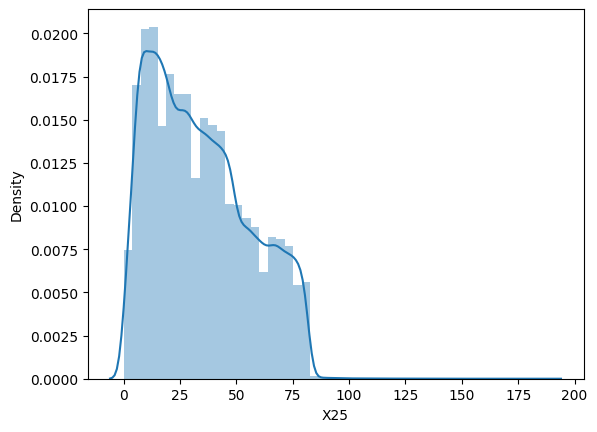

In [59]:
sns.distplot(df[df['X25'].notnull()]['X25'])

In [ ]:
import scipy.stats
# Group the data by the categorical column
grouped = df.groupby('X25')['X1'].mean()

# Calculate the correlation using the spearman method
correlation, p_value = scipy.stats.spearmanr(grouped.index, grouped.values)
print("The spearman correlation is:", correlation)

In [61]:
#from sklearn.impute import KNNImputer

# create an instance of the KNNImputer
#imputer = KNNImputer(n_neighbors=2)

# fit the imputer on the single column
#column_1_imputed = imputer.fit_transform(df[['X25']])

# fill in the missing values in the original dataframe
#df['X25'] = column_1_imputed

#sns.distplot(df['X25'])

In [62]:
#predicting missing values using linear regression
from sklearn.linear_model import LinearRegression
missing_index = duplicate_df[duplicate_df['X25'].isnull()].index
df_train = duplicate_df.dropna()
model = LinearRegression()
model.fit(df_train.index.values.reshape(-1, 1), df_train['X25'])
column_1_predicted = model.predict(missing_index.values.reshape(-1, 1))
duplicate_df.loc[missing_index, 'X25'] = column_1_predicted

/var/folders/_p/sktqnyb16qlfj7xjl0gfncgh0000gn/T/ipykernel_31247/2154306651.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(duplicate_df['X25'])


<AxesSubplot: xlabel='X25', ylabel='Density'>

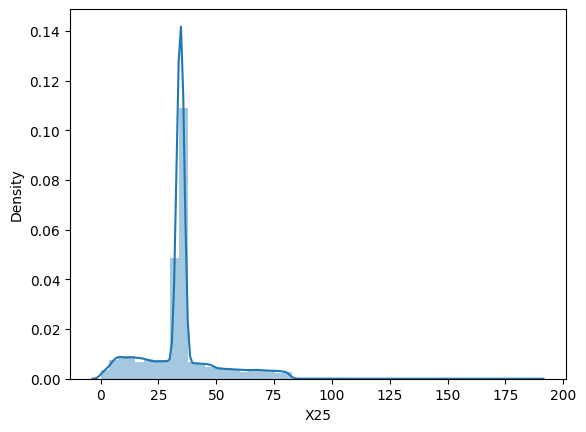

In [63]:
sns.distplot(duplicate_df['X25'])

In [64]:
#tried KNN imputing, interpolate, mean and median fill. But the distribution is being highly effected and 
#spearman correlation and R-squared donot imply any significance
df = df.drop('X25',axis=1)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338989 entries, 0 to 399999
Data columns (total 39 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   X1                      338989 non-null  float64
 1   X5                      338989 non-null  float64
 2   X6                      338989 non-null  float64
 3   X13                     338989 non-null  float64
 4   X21                     338989 non-null  float64
 5   X22                     338989 non-null  float64
 6   X24                     338989 non-null  float64
 7   X27                     338989 non-null  float64
 8   X28                     338989 non-null  float64
 9   X29                     338989 non-null  float64
 10  X30                     338989 non-null  float64
 11  X7_60months             338989 non-null  int64  
 12  X8_A                    338989 non-null  uint8  
 13  X8_B                    338989 non-null  uint8  
 14  X8_C                

In [66]:
df=df.drop('X23_year_quarter',axis=1)

#### Step 2: Build models

In [106]:
X,y=df.drop(['X1'],axis=1), df['X1']

In [68]:
y.head()

0    0.1189
1    0.1071
2    0.1699
3    0.1311
4    0.1357
Name: X1, dtype: float64

In [107]:
#Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [70]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271191 entries, 313027 to 5628
Data columns (total 37 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   X5                      271191 non-null  float64
 1   X6                      271191 non-null  float64
 2   X13                     271191 non-null  float64
 3   X21                     271191 non-null  float64
 4   X22                     271191 non-null  float64
 5   X24                     271191 non-null  float64
 6   X27                     271191 non-null  float64
 7   X28                     271191 non-null  float64
 8   X29                     271191 non-null  float64
 9   X30                     271191 non-null  float64
 10  X7_60months             271191 non-null  int64  
 11  X8_A                    271191 non-null  uint8  
 12  X8_B                    271191 non-null  uint8  
 13  X8_C                    271191 non-null  uint8  
 14  X8_D             

In [108]:
#Fitting linear regression
from sklearn.linear_model import LinearRegression

lr= LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [110]:
y_pred_lr_test = lr.predict(X_test)
y_pred_lr_train = lr.predict(X_train)

In [111]:
from sklearn.metrics import mean_squared_error
lr_rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_lr_test))
lr_rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_lr_train))

In [112]:
print('test set RMSE of lr: {:.3f}'.format(lr_rmse_test))
print('train set RMSE of lr: {:.3f}'.format(lr_rmse_train))

test set RMSE of lr: 0.020
train set RMSE of lr: 0.020


In [76]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize the decision tree regressor
dt = DecisionTreeRegressor(random_state=0)

In [77]:
# Fit the model on the training data
dt.fit(X_train, y_train)


DecisionTreeRegressor(random_state=0)

In [78]:
# Make predictions on the test and train data
y_pred_dt_test = dt.predict(X_test)
y_pred_dt_train = dt.predict(X_train)

# Calculate the RMSE for the test and train data
dt_rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_dt_test))
dt_rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_dt_train))

print("Test RMSE:", dt_rmse_test)
print("Train RMSE:", dt_rmse_train)

Test RMSE: 0.024879466995114702
Train RMSE: 2.3933061363043052e-18


In [80]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the random forest regressor
rf = RandomForestRegressor()

In [81]:
# Fit the model on the training data
rf.fit(X_train, y_train)

RandomForestRegressor()

In [82]:
# Make predictions on the test and train data
y_pred_rf_test = rf.predict(X_test)
y_pred_rf_train = rf.predict(X_train)

# Calculate the RMSE for the test and train data
rf_rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_rf_test))
rf_rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_rf_train))

print("Test RMSE:", rf_rmse_test)
print("Train RMSE:", rf_rmse_train)

Test RMSE: 0.01758516611709572
Train RMSE: 0.006631639619831087


In [83]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the gradient boosting regressor
gb = GradientBoostingRegressor()

# Fit the model on the training data  
gb.fit(X_train, y_train)

# Make predictions on the test and train data
y_pred_gb_test = gb.predict(X_test)
y_pred_gb_train = gb.predict(X_train)

# Calculate the RMSE for the test and train data
gb_rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_gb_test))
gb_rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_gb_train))

print("Test RMSE:", gb_rmse_test)
print("Train RMSE:", gb_rmse_train)


Test RMSE: 0.01812072407191636
Train RMSE: 0.01823911576500005


Will use gradient boosting regressor as its test and train RMSE's are both low and close

In [84]:
#importances = rf.feature_importances_

# Create a mask to select features with importance greater than or equal to 0.001
#mask = (importances >= 0.001)

# Apply the mask to the input data to remove features with importance less than 0.001
#X_train = X_train.loc[:, mask]
#X_test = X_test.loc[:, mask]

In [85]:
#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()
#X_train_norm = scaler.fit_transform(X_train)
#X_test_norm = scaler.transform(X_test)

In [86]:
#rf = RandomForestRegressor(random_state=0)

In [87]:
# Train the model
#rf.fit(X_train_norm, y_train)

In [88]:
# Make predictions on the test and train data
#y_pred_rf_test = rf.predict(X_test_norm)
#y_pred_rf_train = rf.predict(X_train_norm)

# Calculate the RMSE for the test and train data
#rf_rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_rf_test))
#rf_rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_rf_train))

#print("Test RMSE:", rf_rmse_test)
#print("Train RMSE:", rf_rmse_train)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338989 entries, 0 to 399999
Data columns (total 38 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   X1                      338989 non-null  float64
 1   X5                      338989 non-null  float64
 2   X6                      338989 non-null  float64
 3   X13                     338989 non-null  float64
 4   X21                     338989 non-null  float64
 5   X22                     338989 non-null  float64
 6   X24                     338989 non-null  float64
 7   X27                     338989 non-null  float64
 8   X28                     338989 non-null  float64
 9   X29                     338989 non-null  float64
 10  X30                     338989 non-null  float64
 11  X7_60months             338989 non-null  int64  
 12  X8_A                    338989 non-null  uint8  
 13  X8_B                    338989 non-null  uint8  
 14  X8_C                

In [105]:
# these variables are not present in holdout set
df=df.drop('X17_educational',axis=1)
df=df.drop('X8_Unknown',axis=1)

#### Step 3: Test models using holdout data 

In [89]:
dftest=pd.read_csv('/Users/kothasravani/Desktop/loan_holdout.csv')
dftest['X15'].value_counts()

15-Jan    30830
15-Mar    25400
15-Feb    23770
Name: X15, dtype: int64

In [90]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      0 non-null      float64
 1   X2      80000 non-null  int64  
 2   X3      80000 non-null  int64  
 3   X4      80000 non-null  object 
 4   X5      80000 non-null  object 
 5   X6      80000 non-null  object 
 6   X7      80000 non-null  object 
 7   X8      80000 non-null  object 
 8   X9      80000 non-null  object 
 9   X10     75606 non-null  object 
 10  X11     75618 non-null  object 
 11  X12     80000 non-null  object 
 12  X13     80000 non-null  float64
 13  X14     80000 non-null  object 
 14  X15     80000 non-null  object 
 15  X16     15 non-null     object 
 16  X17     80000 non-null  object 
 17  X18     80000 non-null  object 
 18  X19     80000 non-null  object 
 19  X20     80000 non-null  object 
 20  X21     80000 non-null  float64
 21  X22     80000 non-null  int64  
 22

Performing all the operations that have been performed on train set on holdout set variables 

In [91]:
dftest[['X4', 'X5','X6']] = dftest[['X4', 'X5','X6']].replace({'\$':'', ',':''}, regex=True).astype(float)
dftest = dftest.drop(['X2','X3','X4','X9','X16','X18','X26'],axis=1)

In [92]:
dftest['X7_60months'] = dftest['X7'].apply(lambda x: 1 if x == '60 months' else 0)
dftest = dftest.drop('X7',axis=1)

In [93]:
dftest['X8'].fillna('Unknown', inplace=True)
X8_dummies = pd.get_dummies(dftest['X8'], prefix='X8')
dftest = pd.concat([dftest, X8_dummies], axis=1)
dftest = dftest.drop('X8',axis=1)

In [94]:
dftest = dftest.drop('X10',axis=1)
dftest = dftest.drop('X11',axis=1)
dftest = dftest.drop('X12',axis=1)

In [95]:
dftest['X13'].fillna(dftest['X13'].median(), inplace=True)
dftest['X14'] = dftest['X14'].replace(['VERIFIED - income source'], 'VERIFIED - income')
dftest['X14_verified'] = dftest['X14'].apply(lambda x: 1 if x == 'VERIFIED - income' else 0)
dftest = dftest.drop('X14', axis=1)

In [96]:
# convert the values to datetime objects
dftest['X15'] = pd.to_datetime(dftest['X15'], format='%y-%b')

# create a new column with year and quarter
dftest['X15_year_quarter'] = dftest['X15'].dt.to_period('Q').apply(lambda x: str(x.year) + '-Q' + str(x.quarter))

#X15_dummies = pd.get_dummies(dftest['X15_year_quarter'], prefix='X15')
#dftest = pd.concat([dftest, X15_dummies], axis=1)
dftest = dftest.drop(['X15','X15_year_quarter'],axis=1)

In [97]:
X17_dummies = pd.get_dummies(dftest['X17'], prefix='X17')
dftest = pd.concat([dftest, X17_dummies], axis=1)
dftest = dftest.drop('X17',axis=1)
dftest = dftest.drop('X19',axis=1)
dftest = dftest.drop('X20',axis=1)

In [98]:
#dftest['X22_zeroes']=dftest['X22'].apply(lambda x:1 if x == 0 else 0)
dftest = dftest.drop(['X23'],axis=1)
#dftest['X24_zeroes']=dftest['X24'].apply(lambda x:1 if x == 0 else 0)
#dftest['X28_zeroes']=dftest['X28'].apply(lambda x:1 if x == 0 else 0)
#dftest['X29_zeroes']=dftest['X29'].apply(lambda x:1 if x == 0 else 0)
#dftest['X30_zeroes']=dftest['X30'].apply(lambda x:1 if x == 0 else 0)

In [99]:
dftest['X30']=dftest['X30'].replace({'%':''}, regex=True).astype(float)
dftest['X30']=dftest['X30']/100
dftest['X30']=dftest['X30'].interpolate()

#creating the number of closed credit line
dftest['closed_creditline'] = dftest['X31'] - dftest['X27']
dftest['unclosed_creditline'] = dftest['closed_creditline'].apply(lambda x: 1 if x == 0 else 0)
dftest = dftest.drop(['X31', 'closed_creditline'], axis=1)

X32_dummies = pd.get_dummies(dftest['X32'], prefix='X32')
dftest = pd.concat([dftest, X32_dummies], axis=1)
dftest = dftest.drop(['X32'],axis=1)
dftest = dftest.drop('X25',axis=1)

In [100]:
dftest = dftest.drop('X1',axis=1)

In [101]:
X_testset = dftest
X_testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   X5                      80000 non-null  float64
 1   X6                      80000 non-null  float64
 2   X13                     80000 non-null  float64
 3   X21                     80000 non-null  float64
 4   X22                     80000 non-null  int64  
 5   X24                     80000 non-null  int64  
 6   X27                     80000 non-null  int64  
 7   X28                     80000 non-null  int64  
 8   X29                     80000 non-null  int64  
 9   X30                     80000 non-null  float64
 10  X7_60months             80000 non-null  int64  
 11  X8_A                    80000 non-null  uint8  
 12  X8_B                    80000 non-null  uint8  
 13  X8_C                    80000 non-null  uint8  
 14  X8_D                    80000 non-null

In [113]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271191 entries, 368379 to 223406
Data columns (total 35 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   X5                      271191 non-null  float64
 1   X6                      271191 non-null  float64
 2   X13                     271191 non-null  float64
 3   X21                     271191 non-null  float64
 4   X22                     271191 non-null  float64
 5   X24                     271191 non-null  float64
 6   X27                     271191 non-null  float64
 7   X28                     271191 non-null  float64
 8   X29                     271191 non-null  float64
 9   X30                     271191 non-null  float64
 10  X7_60months             271191 non-null  int64  
 11  X8_A                    271191 non-null  uint8  
 12  X8_B                    271191 non-null  uint8  
 13  X8_C                    271191 non-null  uint8  
 14  X8_D           

In [114]:
#Predicting target variable using Gradient Boost
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_testset)

In [118]:
test = pd.read_csv('/Users/kothasravani/Desktop/loan_holdout.csv')
predict = pd.DataFrame({
        'applicant_id': test['X3'],
        'predicted_interest_rate':y_pred_gb*100
    
})

In [119]:
predict.to_csv('/Users/kothasravani/Desktop/Results from Sravani.csv',index=False)

write-up comparing the pros and cons of the modeling techniques: 

I employed various modelling techniques to pre-process the data. One of the advantages of dropping the rows with missing values in the target variable column (interest rate) is that it does not significantly impact the size of the dataset, but the downside is that resulting dataset may have selection bias. I created new features to help in building a more accurate model by capturing the impact of some variables on interest rates. However, one disadvantage of creating dummy variables is that it may lead to multicollinearity. I tried using Linear regression to predict missing values in a column, which may not be accurate if there is no correlation between the missing value column and other variables. I used Spearman correlation and linear regression R-squared for analyzing relationships between X and y variables. Spearman correlation can capture non-linear relationships and does not require assumptions of normality or linearity but it may miss complex relationships. Whereas a linear regression assumes a linear relationship and can be affected by outliers.Based on the performance metrics, it appeared to me that Gradient Boosting is the best model for this dataset. It has the lowest Test RMSE, which indicates that it has the best predictive power among the models evaluated. Additionally, the Train RMSE is higher than the Test RMSE, which suggests that the model is not overfitting the training data. Random Forest also performs well, with a Test RMSE that is only slightly higher than Gradient Boosting. However, it has a higher Train RMSE than Gradient Boosting, indicating that it may be overfitting the training data. While Decision Tree has the lowest Train RMSE, its Test RMSE is the highest among the models, indicating that it has the worst predictive power. Finally, Linear Regression performs similarly to Gradient Boosting, but its performance is not as good as it has higher Test and Train RMSE. Overall, Gradient Boosting appears to be the best model for this dataset, as it has the best predictive power and is less likely to overfit the data.